In [119]:
import numpy as np
import pandas as pd

In [120]:
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import re,string,unicodedata
from bs4 import BeautifulSoup

In [121]:
import json

def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

data = list(parse_data('Sarcasm_Headlines_Dataset_v2.json'))

In [122]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [123]:
import nltk
nltk.download('stopwords')


stop = set(stopwords.words('english'))
punctuation=list(string.punctuation)
stop.update(punctuation)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [124]:
#create dependent and independent variables
sentences = []
labels = []
urls = []
for d in data:
    sentences.append(d['headline'])
    labels.append(d['is_sarcastic'])
    urls.append(d['article_link'])

In [125]:
tokenizer = Tokenizer(oov_token = "<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [126]:
list(word_index.keys())[:10]

['<OOV>', 'to', 'of', 'the', 'in', 'for', 'a', 'on', 'and', 'with']

In [127]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences,padding = 'post')

In [128]:
sequences[0]

[16004, 355, 3167, 7474, 2644, 3, 661, 1119]

In [129]:
padded

array([[16004,   355,  3167, ...,     0,     0,     0],
       [ 7475,  1775,   758, ...,     0,     0,     0],
       [  863,    33, 11427, ...,     0,     0,     0],
       ...,
       [    4,   100,   629, ...,     0,     0,     0],
       [ 1870,  1313,  3317, ...,     0,     0,     0],
       [  217,  3283,    21, ...,     0,     0,     0]], dtype=int32)

In [130]:
print(padded[0])
print(padded.shape)

[16004   355  3167  7474  2644     3   661  1119     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
(28619, 152)


In [131]:
#after looking up on raw data tokens , sequences lets move forward to create training and testing dataset. Henceforth applying neural network
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [132]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [133]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [134]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [135]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [136]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_4   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 24)                408       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [137]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 4s - loss: 0.6432 - accuracy: 0.6471 - val_loss: 0.5003 - val_accuracy: 0.8180 - 4s/epoch - 6ms/step
Epoch 2/30
625/625 - 3s - loss: 0.3963 - accuracy: 0.8422 - val_loss: 0.3741 - val_accuracy: 0.8363 - 3s/epoch - 5ms/step
Epoch 3/30
625/625 - 4s - loss: 0.2988 - accuracy: 0.8802 - val_loss: 0.3497 - val_accuracy: 0.8439 - 4s/epoch - 7ms/step
Epoch 4/30
625/625 - 3s - loss: 0.2489 - accuracy: 0.9030 - val_loss: 0.3347 - val_accuracy: 0.8552 - 3s/epoch - 5ms/step
Epoch 5/30
625/625 - 3s - loss: 0.2146 - accuracy: 0.9193 - val_loss: 0.3359 - val_accuracy: 0.8559 - 3s/epoch - 5ms/step
Epoch 6/30
625/625 - 3s - loss: 0.1877 - accuracy: 0.9294 - val_loss: 0.3468 - val_accuracy: 0.8525 - 3s/epoch - 5ms/step
Epoch 7/30
625/625 - 4s - loss: 0.1673 - accuracy: 0.9387 - val_loss: 0.3611 - val_accuracy: 0.8507 - 4s/epoch - 6ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1499 - accuracy: 0.9454 - val_loss: 0.4336 - val_accuracy: 0.8305 - 2s/epoch - 4ms/step
Epoch 9/30
625/625 - 3s 

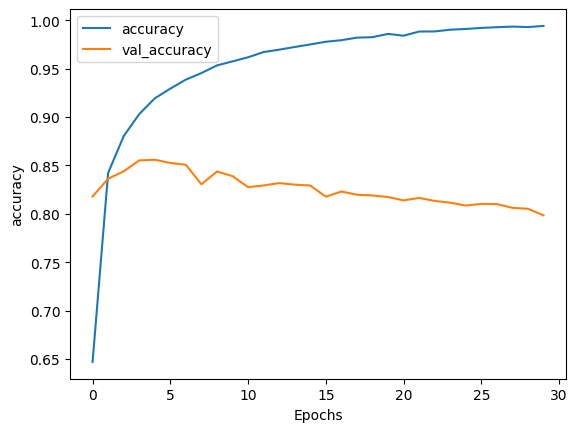

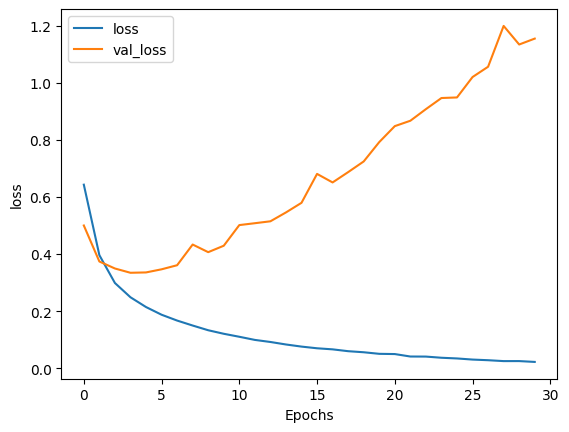

In [138]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [139]:
pred = (model.predict(testing_padded) > 0.5).astype("int32")

270/270 [==============================] - 1s 2ms/step


In [140]:
from sklearn.metrics import classification_report

print(classification_report(testing_labels,pred,target_names = ['Not Sarcastic','Sarcastic']))

               precision    recall  f1-score   support

Not Sarcastic       0.85      0.75      0.80      4524
    Sarcastic       0.76      0.85      0.80      4095

     accuracy                           0.80      8619
    macro avg       0.80      0.80      0.80      8619
 weighted avg       0.80      0.80      0.80      8619

